In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd

## Feature Engineering: Calculate Lipinksi Descriptors 

Christopher Lipinksi found a rule-of-thumb for evaluating the druglikeness of compounds. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule. The satisfaction of the rules contribute to a compound's pharmokinetic profile consisting of Absorption, Distribution, Metabolism, Excretion (ADME). 

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [2]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')
df.canonical_smiles

0              CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1        CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2      CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3      CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4      CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
                             ...                        
857                       COc1ccccc1/C=C/c1cc(=O)c(O)co1
858                        O=c1cc(/C=C/c2ccc(O)cc2)occ1O
859                          O=c1cc(/C=C/c2ccccc2O)occ1O
860                     O=c1cc(/C=C/c2cc(O)cc(O)c2)occ1O
861    O=C(/C=C/c1ccc(O)c(O)c1)NCCCNC(=O)/C=C/c1ccc(O...
Name: canonical_smiles, Length: 862, dtype: object

In [3]:
df.columns

Index(['index', 'molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'class'],
      dtype='object')

In [4]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [5]:
df_lipinski = lipinski(df.canonical_smiles)

In [6]:
# New database with lipinski descriptors of our compounds:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.3188,1.0,2.0
1,299.461,3.2412,1.0,3.0
2,311.422,3.3188,1.0,2.0
3,327.877,3.8331,1.0,2.0
4,372.328,3.9422,1.0,2.0
...,...,...,...,...
857,244.246,2.5244,1.0,4.0
858,230.219,2.2214,2.0,4.0
859,230.219,2.2214,2.0,4.0
860,246.218,1.9270,3.0,5.0


In [7]:
df

,index,molecule_chembl_id,canonical_smiles,standard_value,class
0,0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...,...
857,1131,CHEMBL4286002,COc1ccccc1/C=C/c1cc(=O)c(O)co1,7930.0,intermediate
858,1133,CHEMBL4287929,O=c1cc(/C=C/c2ccc(O)cc2)occ1O,7200.0,intermediate
859,1134,CHEMBL4284208,O=c1cc(/C=C/c2ccccc2O)occ1O,8290.0,intermediate
860,1135,CHEMBL4294830,O=c1cc(/C=C/c2cc(O)cc(O)c2)occ1O,17950.0,inactive


### Combine the two dataframes

In [8]:
df_combined = pd.concat([df, df_lipinski], axis = 1)
df_combined

,index,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.3188,1.0,2.0
1,1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.2412,1.0,3.0
2,2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.3188,1.0,2.0
3,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.8331,1.0,2.0
4,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.9422,1.0,2.0
...,...,...,...,...,...,...,...,...,...
857,1131,CHEMBL4286002,COc1ccccc1/C=C/c1cc(=O)c(O)co1,7930.0,intermediate,244.246,2.5244,1.0,4.0
858,1133,CHEMBL4287929,O=c1cc(/C=C/c2ccc(O)cc2)occ1O,7200.0,intermediate,230.219,2.2214,2.0,4.0
859,1134,CHEMBL4284208,O=c1cc(/C=C/c2ccccc2O)occ1O,8290.0,intermediate,230.219,2.2214,2.0,4.0
860,1135,CHEMBL4294830,O=c1cc(/C=C/c2cc(O)cc(O)c2)occ1O,17950.0,inactive,246.218,1.9270,3.0,5.0


### Normalize the IC50 values under the 'standard value' columns. 

To do this, we will take the -log of IC50 values to get the pIC50 values of each compound. The following function will first convert the IC50 values from nM to M. Then, it takes the -log10 of the IC50 value to create a pIC50 column and replace the 'standard value' column with it. 

In [9]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [10]:
df_combined.standard_value.describe()

count       862.000000
mean      20051.511218
std       58765.079219
min          -1.000000
25%         100.000000
50%        2975.000000
75%       15000.000000
max      800000.000000
Name: standard_value, dtype: float64

In [11]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [12]:
df_norm = norm_value(df_combined)
df_norm

,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5000.0
1,1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,2700.0
2,2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,1800.0
3,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,11000.0
4,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...,...
857,1131,CHEMBL4286002,COc1ccccc1/C=C/c1cc(=O)c(O)co1,intermediate,244.246,2.5244,1.0,4.0,7930.0
858,1133,CHEMBL4287929,O=c1cc(/C=C/c2ccc(O)cc2)occ1O,intermediate,230.219,2.2214,2.0,4.0,7200.0
859,1134,CHEMBL4284208,O=c1cc(/C=C/c2ccccc2O)occ1O,intermediate,230.219,2.2214,2.0,4.0,8290.0
860,1135,CHEMBL4294830,O=c1cc(/C=C/c2cc(O)cc(O)c2)occ1O,inactive,246.218,1.9270,3.0,5.0,17950.0


In [13]:
df_norm.standard_value_norm.describe()

count       862.000000
mean      20051.511218
std       58765.079219
min          -1.000000
25%         100.000000
50%        2975.000000
75%       15000.000000
max      800000.000000
Name: standard_value_norm, dtype: float64

In [14]:
df_final = pIC50(df_norm)
df_final

C:\Users\aditj\anaconda.updated\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...,...
857,1131,CHEMBL4286002,COc1ccccc1/C=C/c1cc(=O)c(O)co1,intermediate,244.246,2.5244,1.0,4.0,5.100727
858,1133,CHEMBL4287929,O=c1cc(/C=C/c2ccc(O)cc2)occ1O,intermediate,230.219,2.2214,2.0,4.0,5.142668
859,1134,CHEMBL4284208,O=c1cc(/C=C/c2ccccc2O)occ1O,intermediate,230.219,2.2214,2.0,4.0,5.081445
860,1135,CHEMBL4294830,O=c1cc(/C=C/c2cc(O)cc(O)c2)occ1O,inactive,246.218,1.9270,3.0,5.0,4.745936


In [15]:
df_final.pIC50.describe()

count    861.000000
mean       5.872235
std        1.351522
min        3.096910
25%        4.823909
50%        5.522879
75%        7.000000
max        9.522879
Name: pIC50, dtype: float64

In [45]:
df_final.to_csv('BetaAmyloidA4_04_bioactivity_data_3class_pIC50.csv')

### The IC50 values have been normalized under the pIC50 column. We will now remove the 'intermediate' bioactivity class so we are only left with the 'active' and 'inactive' classes. 

In [16]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
5,5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
6,6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
7,8,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...,...
852,1122,CHEMBL4226831,COc1ccc(CCC(=O)N2CCN(Cc3ccc(O)c4ncccc34)CC2)cc1,inactive,405.498,3.2260,1.0,5.0,4.738024
853,1123,CHEMBL4225989,O=C(CCc1ccc(F)cc1)N1CCN(Cc2ccc(O)c3ncccc23)CC1,inactive,393.462,3.3565,1.0,4.0,4.685922
854,1124,CHEMBL194823,O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2,inactive,478.127,6.3993,2.0,5.0,4.346787
855,1127,CHEMBL4282190,O=c1cc(/C=C/c2cccc(F)c2)occ1O,inactive,232.210,2.6549,1.0,3.0,4.752518


## Exploratory Data Analysis using Lipinski Descriptors

In [17]:
!pip install seaborn
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency Plot of the Two Bioactivity Classes

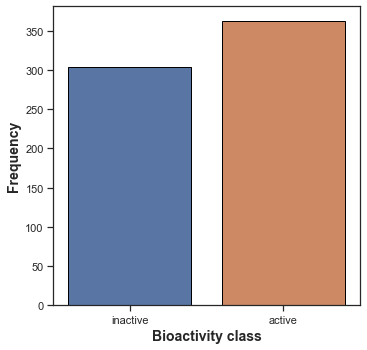

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter Plot of Molecular Weight versus LogP

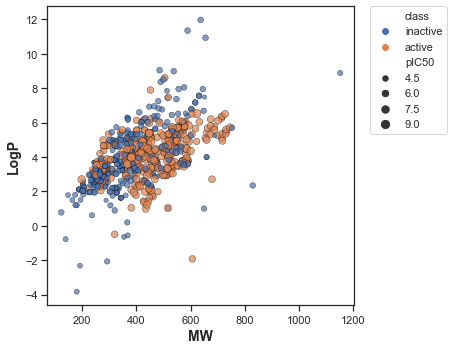

In [19]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### Boxplots


#### pIC50 value
Note that the boxplot depicts the classification boundaries we set in the Data Processing step - 'active' compounds are defined with a pIC50 value of <5, and 'inactive' compounds are those with a pIC50 value of > 6.  

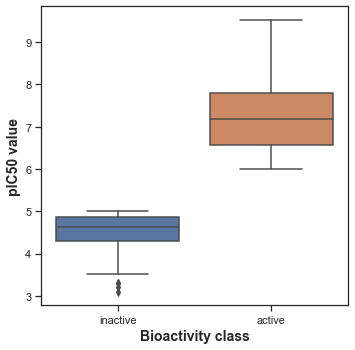

In [20]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### Statistical Analysis using the Mann-Whitney U Test. 

##### The Mann-Whitney U test is used to assess whether two groups are statistically significant. In this case, we will perform the Mann-Whitney U Test for the four Lipinski descriptors (MW,  LogP, Number of H donors, Number of H acceptors).   

In [27]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [29]:
#This is a test to prove that the Mann Whitney U Test function shown above is accurate. We already know that the pIC50 values are statistically significant, and the output of the function provides the same conclusion as it rejected the null hypothesis
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,4.125803e-110,0.05,Different distribution (reject H0)


##### Molecular Weight (MW)

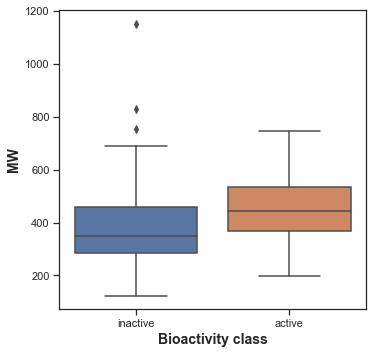

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [34]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,37284.5,2.627929e-13,0.05,Different distribution (reject H0)


##### LogP

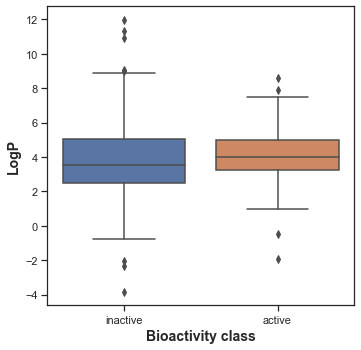

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [37]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,47142.0,0.000595,0.05,Different distribution (reject H0)


##### Num H Donors

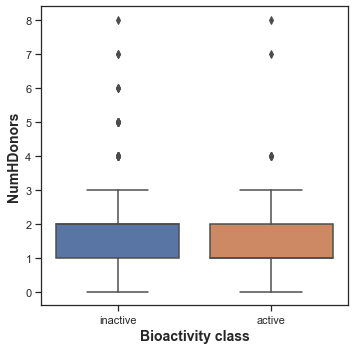

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')


In [41]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,43969.0,0.000001,0.05,Different distribution (reject H0)


##### Num H Acceptors

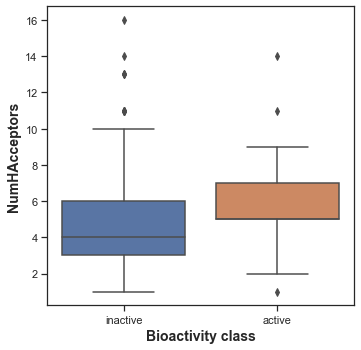

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [43]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,38629.0,5.413248e-12,0.05,Different distribution (reject H0)


#### Summary of the Results

All the Lipinski Descriptors showed a statistically significant difference between the active and inactive groups. 

# Zip Files

In [44]:
! zip -r results.zip . -i *.csv *.pdf

  adding: bioactivity_data.csv (164 bytes security) (deflated 92%)
  adding: bioactivity_preprocessed_data.csv (164 bytes security) (deflated 81%)
  adding: bioactivity_preprocessed_data_test.csv (164 bytes security) (deflated 80%)
  adding: mannwhitneyu_LogP.csv (164 bytes security) (deflated 8%)
  adding: mannwhitneyu_MW.csv (164 bytes security) (deflated 7%)
  adding: mannwhitneyu_NumHAcceptors.csv (164 bytes security) (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (164 bytes security) (deflated 8%)
  adding: mannwhitneyu_pIC50.csv (164 bytes security) (deflated 11%)
  adding: plot_bioactivity_class.pdf (164 bytes security) (deflated 40%)
  adding: plot_ic50.pdf (164 bytes security) (deflated 38%)
  adding: plot_LogP.pdf (164 bytes security) (deflated 40%)
  adding: plot_MW.pdf (164 bytes security) (deflated 41%)
  adding: plot_MW_vs_LogP.pdf (164 bytes security) (deflated 5%)
  adding: plot_NumHAcceptors.pdf (164 bytes security) (deflated 40%)
  adding: plot_NumHDonors.pdf (1